In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = '../running_metrics/training_metrics_UNetCustom.csv'
df = pd.read_csv(data_path)

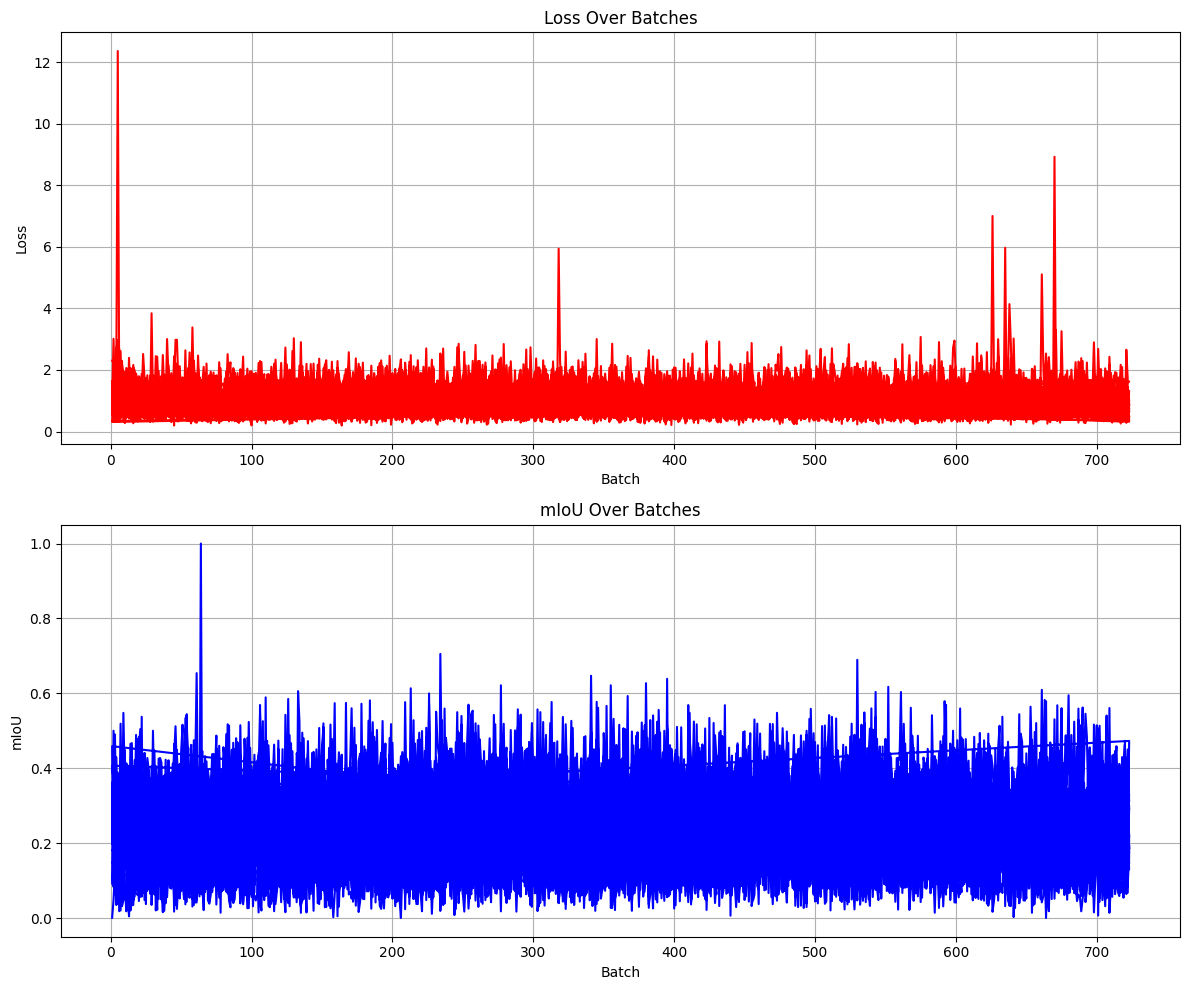

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(df['Batch'], df['Loss'], color='red')
ax1.set_title('Loss Over Batches')
ax1.set_xlabel('Batch')
ax1.set_ylabel('Loss')
ax1.grid(True)

ax2.plot(df['Batch'], df['mIoU'], color='blue')
ax2.set_title('mIoU Over Batches')
ax2.set_xlabel('Batch')
ax2.set_ylabel('mIoU')
ax2.grid(True)

plt.tight_layout()
plt.show()

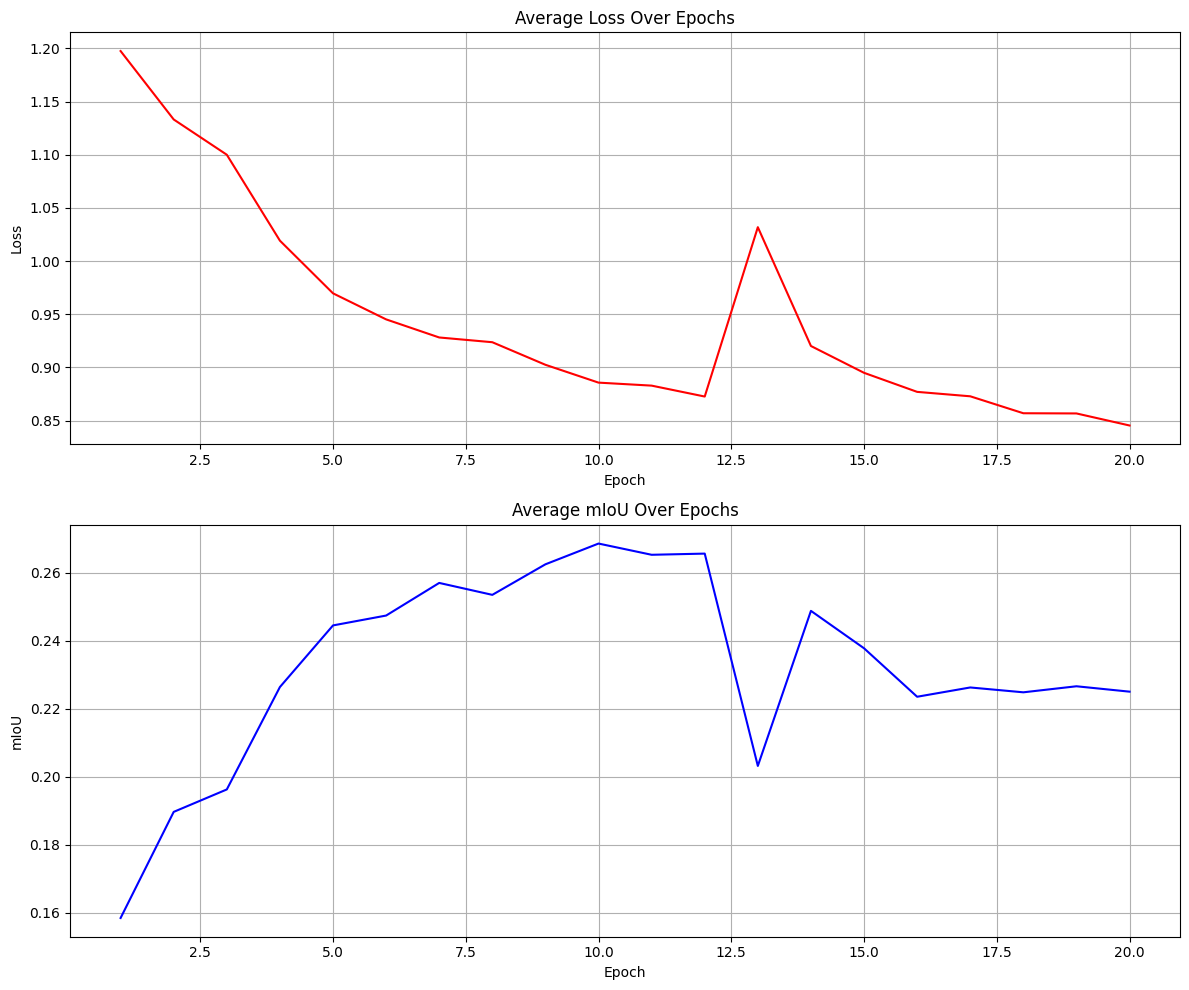

In [5]:

epoch_data = df.groupby('Epoch').mean().reset_index()

# Create a figure with two subplots for Loss and mIoU over epochs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot average Loss over epochs
ax1.plot(epoch_data['Epoch'], epoch_data['Loss'], color='red')
ax1.set_title('Average Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)

# Plot average mIoU over epochs
ax2.plot(epoch_data['Epoch'], epoch_data['mIoU'], color='blue')
ax2.set_title('Average mIoU Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('mIoU')
ax2.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

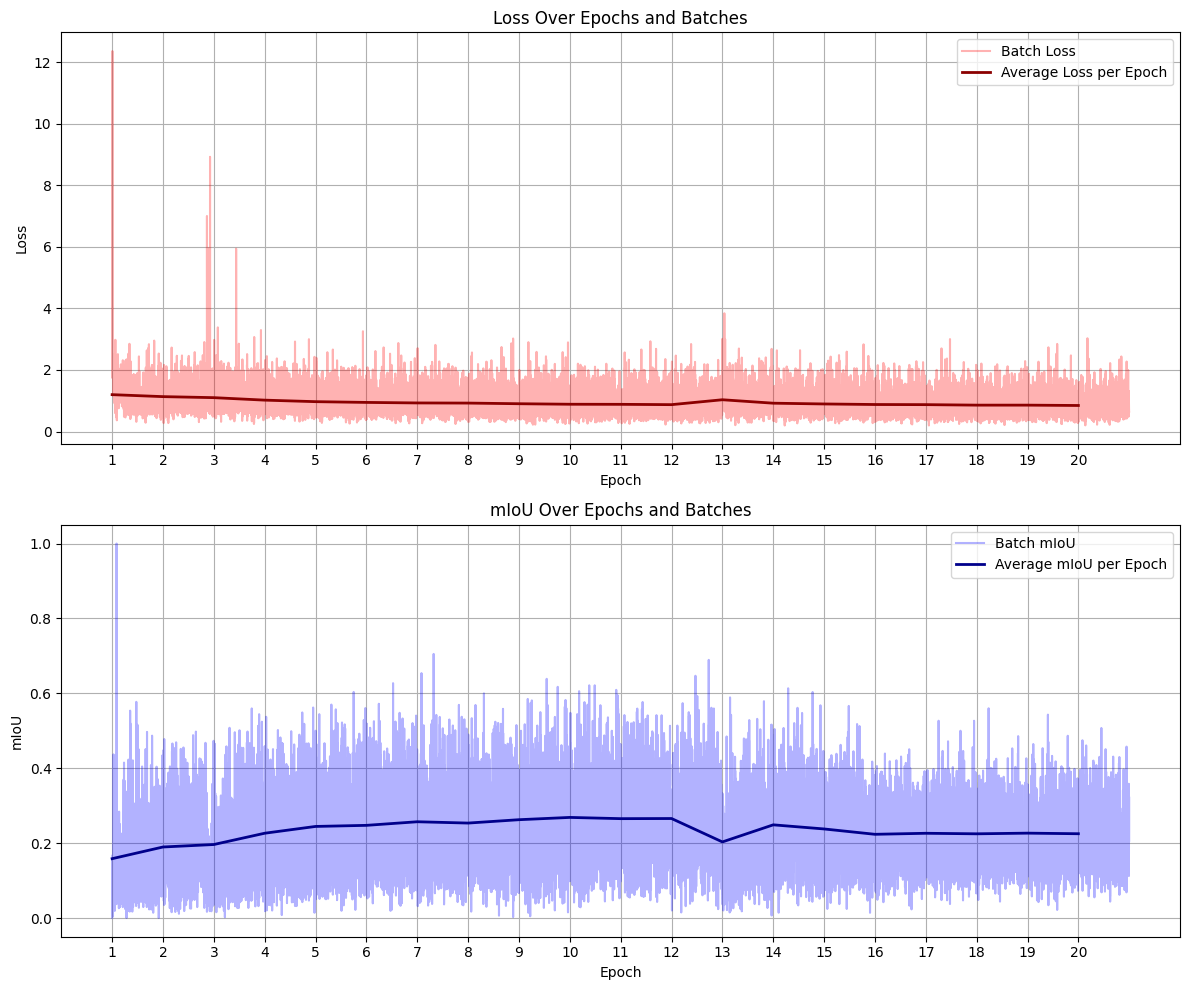

In [ ]:
df['Epoch_Batch'] = df['Epoch'] + (df['Batch'] - 1) / df['Batch'].max()

# Group by 'Epoch' and calculate the mean of 'Loss' and 'mIoU' for each epoch
epoch_avg = df.groupby('Epoch').mean().reset_index()

# Create a figure with two subplots for Loss and mIoU over epochs and batches
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Loss for each batch sequentially and overlay with average Loss per epoch
ax1.plot(df['Epoch_Batch'], df['Loss'], color='red', alpha=0.3, label='Batch Loss')
ax1.plot(epoch_avg['Epoch'], epoch_avg['Loss'], color='darkred', label='Average Loss per Epoch', linewidth=2)
ax1.set_title('Loss Over Epochs and Batches')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot mIoU for each batch sequentially and overlay with average mIoU per epoch
ax2.plot(df['Epoch_Batch'], df['mIoU'], color='blue', alpha=0.3, label='Batch mIoU')
ax2.plot(epoch_avg['Epoch'], epoch_avg['mIoU'], color='darkblue', label='Average mIoU per Epoch', linewidth=2)
ax2.set_title('mIoU Over Epochs and Batches')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('mIoU')
ax2.legend()
ax2.grid(True)

# Set the x-ticks to show only integer epochs for clarity
ax1.set_xticks(epoch_avg['Epoch'])
ax2.set_xticks(epoch_avg['Epoch'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_7828\176638281.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Epoch_Batch'] = filtered_df['Epoch'] + (filtered_df['Batch'] - 1) / filtered_df['Batch'].max()


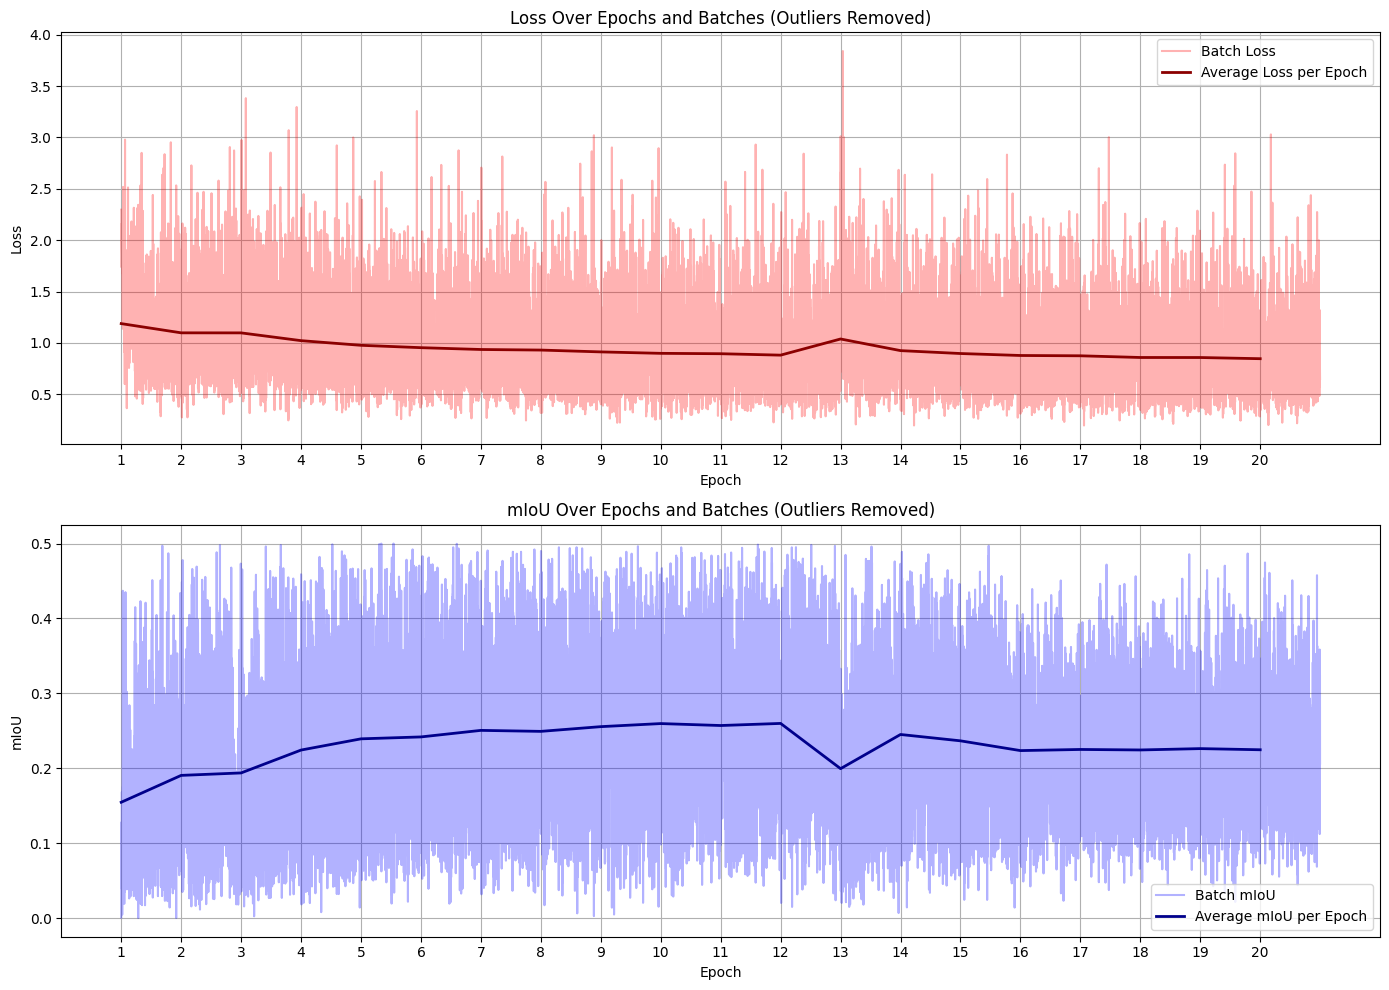

In [ ]:
loss_threshold = 4.0
miou_threshold = 0.5

# Apply filtering
filtered_df = df[(df['Loss'] <= loss_threshold) & (df['mIoU'] <= miou_threshold)]

# Group by 'Epoch' and calculate the mean of 'Loss' and 'mIoU' for each epoch
epoch_avg = filtered_df.groupby('Epoch').mean().reset_index()

# Create a continuous x-axis for each batch within each epoch
filtered_df['Epoch_Batch'] = filtered_df['Epoch'] + (filtered_df['Batch'] - 1) / filtered_df['Batch'].max()

# Create a figure with two subplots for Loss and mIoU over epochs and batches
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot Loss for each batch sequentially and overlay with average Loss per epoch
ax1.plot(filtered_df['Epoch_Batch'], filtered_df['Loss'], color='red', alpha=0.3, label='Batch Loss')
ax1.plot(epoch_avg['Epoch'], epoch_avg['Loss'], color='darkred', label='Average Loss per Epoch', linewidth=2)
ax1.set_title('Loss Over Epochs and Batches (Outliers Removed)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot mIoU for each batch sequentially and overlay with average mIoU per epoch
ax2.plot(filtered_df['Epoch_Batch'], filtered_df['mIoU'], color='blue', alpha=0.3, label='Batch mIoU')
ax2.plot(epoch_avg['Epoch'], epoch_avg['mIoU'], color='darkblue', label='Average mIoU per Epoch', linewidth=2)
ax2.set_title('mIoU Over Epochs and Batches (Outliers Removed)')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('mIoU')
ax2.legend()
ax2.grid(True)

# Set the x-ticks to show only integer epochs for clarity
ax1.set_xticks(epoch_avg['Epoch'])
ax2.set_xticks(epoch_avg['Epoch'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()